In [1]:
!python -c "import torch; print(torch.version.cuda)"

11.1


In [2]:
# PyTorch version
!python -c "import torch; print(torch.__version__)"

1.10.0+cu111


In [3]:
!pip install torch-geometric
!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu111.html
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu111.html

Looking in links: https://data.pyg.org/whl/torch-1.10.0+cu111.html
Looking in links: https://data.pyg.org/whl/torch-1.10.0+cu111.html


In [4]:
import torch
from torch_geometric.data import Data

# **Common Benchmark Datasets**
PyG contains a large number of common benchmark datasets, e.g., all Planetoid datasets (Cora, Citeseer, Pubmed), all graph classification datasets from http://graphkernels.cs.tu-dortmund.de and their cleaned versions, the QM7 and QM9 dataset, and a handful of 3D mesh/point cloud datasets like FAUST, ModelNet10/40 and ShapeNet.

Initializing a dataset is straightforward. An initialization of a dataset will automatically download its raw files and process them to the previously described Data format. E.g., to load the ENZYMES dataset (consisting of 600 graphs within 6 classes), type:



In [6]:
from torch_geometric.datasets import TUDataset
dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES')

In [7]:
len(dataset)

600

In [8]:
dataset.num_classes

6

In [9]:
dataset.num_node_features

3

In [10]:
dataset

ENZYMES(600)

In [11]:
data = dataset[0]

data.x: Node feature matrix with shape [num_nodes, num_node_features]

data.edge_index: Graph connectivity in COO format with shape [2, num_edges] and type torch.long

data.edge_attr: Edge feature matrix with shape [num_edges, num_edge_features]

data.y: Target to train against (may have arbitrary shape), e.g., node-level targets of shape [num_nodes, *] or graph-level targets of shape [1, *]

data.pos: Node position matrix with shape [num_nodes, num_dimensions]

In [12]:
data

Data(edge_index=[2, 168], x=[37, 3], y=[1])

In [13]:
from torch_geometric.utils import to_networkx

In [14]:
type(data)

torch_geometric.data.data.Data

In [15]:
networkX_graph = to_networkx(data)

In [16]:
type(networkX_graph)

networkx.classes.digraph.DiGraph

In [17]:
import networkx as nx

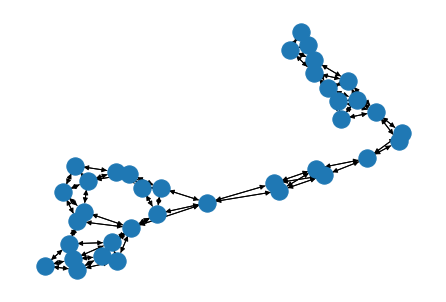

In [18]:
nx.draw(networkX_graph)

## **Cora dataset**
"The Cora dataset consists of 2708 scientific publications classified into one of seven classes. The citation network consists of 5429 links. Each publication in the dataset is described by a 0/1-valued word vector indicating the absence/presence of the corresponding word from the dictionary. The dictionary consists of 1433 unique words." - Papers with Code.

https://graphsandnetworks.com/the-cora-dataset/

In [19]:
from torch_geometric.datasets import Planetoid
cora_dataset = Planetoid(root='tmp/Cora', name='Cora')

In [20]:
cora_dataset

Cora()

In [21]:
cora_dataset.len()

1

In [22]:
# number of graphs
print("Number of graphs: ", len(cora_dataset))

# number of features
print("Number of features: ", cora_dataset.num_features)

# number of classes
print("Number of classes: ", cora_dataset.num_classes)

Number of graphs:  1
Number of features:  1433
Number of classes:  7


In [23]:
c_ds = cora_dataset[0]

In [24]:
c_ds

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [25]:
# number of nodes
print("Number of nodes: ", c_ds.num_nodes)

# number of edges
print("Number of edges: ", c_ds.num_edges)

# check if directed
print("Is directed: ", c_ds.is_directed())

Number of nodes:  2708
Number of edges:  10556
Is directed:  False


In [26]:
c_ds.x[:0].shape

torch.Size([0, 1433])

In [27]:
c_ds.x[:1].shape

torch.Size([1, 1433])

In [28]:
c_ds.x[0].shape

torch.Size([1433])

In [29]:
# sample nodes from the graph
print("Shape of sample nodes: ", c_ds.x[:5].shape)

Shape of sample nodes:  torch.Size([5, 1433])


In [30]:
c_ds_5 = c_ds.x[:5]

In [31]:
c_ds_5.shape

torch.Size([5, 1433])

In [32]:
# number of graphs
print("Number of graphs: ", len(c_ds_5))
print("Number of features: ", len(c_ds_5[0]))

Number of graphs:  5
Number of features:  1433


In [33]:
c_ds

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [ ]:
## train_mask=[2708], val_mask=[2708], test_mask=[2708]
## Look Above

In [34]:
# check training nodes
print("# of nodes to train on: ", c_ds.train_mask.sum().item())
# check test nodes
print("# of nodes to test on: ", c_ds.test_mask.sum().item())
# check validation nodes
print("# of nodes to validate on: ", c_ds.val_mask.sum().item())

# of nodes to train on:  140
# of nodes to test on:  1000
# of nodes to validate on:  500


In [35]:
type(c_ds)

torch_geometric.data.data.Data

In [36]:
networkX_graph = to_networkx(c_ds)

In [37]:
type(networkX_graph)

networkx.classes.digraph.DiGraph

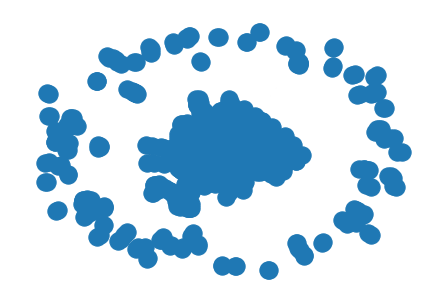

In [38]:
nx.draw(networkX_graph)

In [40]:
networkX_graph

In [39]:
print(nx.is_weighted(networkX_graph))
print(nx.is_directed(networkX_graph))
print(networkX_graph.order())
print(networkX_graph.number_of_edges())
print(networkX_graph.number_of_nodes())
print(networkX_graph.edges)
print(networkX_graph.nodes)

False
True
2708
10556
2708
[(0, 633), (0, 1862), (0, 2582), (1, 2), (1, 652), (1, 654), (2, 1), (2, 332), (2, 1454), (2, 1666), (2, 1986), (3, 2544), (4, 1016), (4, 1256), (4, 1761), (4, 2175), (4, 2176), (5, 1629), (5, 1659), (5, 2546), (6, 373), (6, 1042), (6, 1416), (6, 1602), (7, 208), (8, 269), (8, 281), (8, 1996), (9, 723), (9, 2614), (10, 476), (10, 2545), (11, 1655), (11, 1839), (12, 1001), (12, 1318), (12, 2661), (12, 2662), (13, 1701), (13, 1810), (14, 158), (14, 2034), (14, 2075), (14, 2077), (14, 2668), (15, 1090), (15, 1093), (15, 1271), (15, 2367), (16, 970), (16, 1632), (16, 2444), (16, 2642), (17, 24), (17, 927), (17, 1315), (17, 1316), (17, 2140), (18, 139), (18, 1560), (18, 1786), (18, 2082), (18, 2145), (19, 1939), (20, 1072), (20, 2269), (20, 2270), (20, 2374), (20, 2375), (21, 1043), (21, 2310), (22, 39), (22, 1234), (22, 1702), (22, 1703), (22, 2238), (23, 2159), (24, 17), (24, 201), (24, 598), (24, 1636), (24, 1701), (24, 2139), (24, 2141), (25, 1301), (25, 1344)

In [41]:
c_ds.x.shape

torch.Size([2708, 1433])

In [44]:
c_ds.x[1734].shape

torch.Size([1433])

In [45]:
c_ds_10 = c_ds.x[:10]

In [46]:
c_ds_10.shape

torch.Size([10, 1433])

In [47]:
type(c_ds_10)

torch.Tensor

In [48]:
c_ds

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [49]:
nx.write_gexf(networkX_graph, 'cora_ex.gexf')

In [50]:
nx.write_graphml(networkX_graph, 'cora_ex.graphml')

# **Cora Dataset from NetworkX**
- download cora.tgz from the link below:
  -  https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz
- upload cora.tgz to google colab

In [51]:
!tar -xvf /content/cora.tgz

cora/
cora/README
cora/cora.cites
cora/cora.content


In [52]:
import os
import networkx as nx
import pandas as pd
data_dir = os.path.expanduser("/content/cora")

In [53]:
edgelist = pd.read_csv(os.path.join(data_dir, "cora.cites"), sep='\t', header=None, names=["target", "source"])
edgelist["label"] = "cites"

In [55]:
edgelist.sample(frac=1).head(10)

,target,source,label
5339,688824,1133008,cites
1052,4649,411092,cites
3736,82920,1129683,cites
1320,6214,93320,cites
2784,33231,1132887,cites
66,35,197054,cites
3660,75983,1115790,cites
3887,94641,1153897,cites
3680,77758,613409,cites
3145,45212,1105764,cites


In [56]:
type(edgelist)

pandas.core.frame.DataFrame

In [57]:
Gnx = nx.from_pandas_edgelist(edgelist, edge_attr="label")
nx.set_node_attributes(Gnx, "paper", "label")

In [58]:
print(nx.is_weighted(Gnx))
print(nx.is_directed(Gnx))
print(Gnx.order())
print(Gnx.number_of_edges())
print(Gnx.number_of_nodes())
print(Gnx.edges)
print(Gnx.nodes)

False
False
2708
5278
2708
[(1033, 35), (1033, 1034), (1033, 1107062), (1033, 41714), (1033, 45605), (35, 103482), (35, 103515), (35, 1050679), (35, 1103960), (35, 1103985), (35, 1109199), (35, 1112911), (35, 1113438), (35, 1113831), (35, 1114331), (35, 1117476), (35, 1119505), (35, 1119708), (35, 1120431), (35, 1123756), (35, 1125386), (35, 1127430), (35, 1127913), (35, 1128204), (35, 1128227), (35, 1128314), (35, 1128453), (35, 1128945), (35, 1128959), (35, 1128985), (35, 1129018), (35, 1129027), (35, 1129573), (35, 1129683), (35, 1129778), (35, 1130847), (35, 1130856), (35, 1131116), (35, 1131360), (35, 1131557), (35, 1131752), (35, 1133196), (35, 1133338), (35, 1136814), (35, 1137466), (35, 1152421), (35, 1152508), (35, 1153065), (35, 1153280), (35, 1153577), (35, 1153853), (35, 1153943), (35, 1154176), (35, 1154459), (35, 116552), (35, 12576), (35, 128540), (35, 132806), (35, 135130), (35, 141342), (35, 141347), (35, 148170), (35, 15670), (35, 1688), (35, 175291), (35, 178727), (3

In [59]:
Gnx

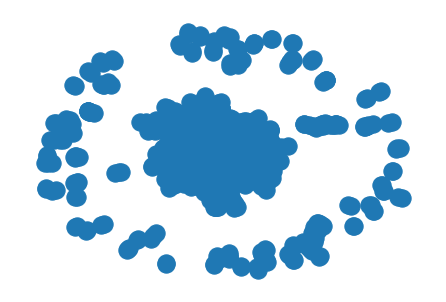

In [60]:
nx.draw(Gnx)

In [61]:
Gnx.number_of_nodes()

2708

In [62]:
Gnx.nodes

NodeView((1033, 35, 103482, 103515, 1050679, 1103960, 1103985, 1109199, 1112911, 1113438, 1113831, 1114331, 1117476, 1119505, 1119708, 1120431, 1123756, 1125386, 1127430, 1127913, 1128204, 1128227, 1128314, 1128453, 1128945, 1128959, 1128985, 1129018, 1129027, 1129573, 1129683, 1129778, 1130847, 1130856, 1131116, 1131360, 1131557, 1131752, 1133196, 1133338, 1136814, 1137466, 1152421, 1152508, 1153065, 1153280, 1153577, 1153853, 1153943, 1154176, 1154459, 116552, 12576, 128540, 132806, 135130, 141342, 141347, 148170, 15670, 1688, 175291, 178727, 18582, 190697, 190706, 1956, 197054, 198443, 198653, 206371, 210871, 229635, 231249, 248425, 249421, 254923, 259701, 259702, 263279, 263498, 265203, 273152, 27510, 28290, 286500, 287787, 28851, 289779, 289780, 289781, 307015, 335733, 33904, 33907, 35061, 38205, 387795, 415693, 41714, 427606, 44368, 45599, 46079, 46431, 486840, 48766, 503883, 503893, 513189, 54129, 54131, 56119, 561238, 568857, 573964, 573978, 574009, 574264, 574462, 575077, 5752

In [63]:
# Get the node ID from the above list
Gnx.nodes[1050679]

{'label': 'paper'}

In [64]:
feature_names = ["w_{}".format(ii) for ii in range(1433)]
column_names =  feature_names + ["subject"]
node_data = pd.read_csv(os.path.join(data_dir, "cora.content"), sep='\t', header=None, names=column_names)

In [65]:
node_data

,w_0,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9,...,w_1424,w_1425,w_1426,w_1427,w_1428,w_1429,w_1430,w_1431,w_1432,subject
31336,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Neural_Networks
1061127,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Rule_Learning
1106406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
13195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
37879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
1128977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
1128978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
117328,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Case_Based


In [66]:
set(node_data["subject"])

{'Case_Based',
 'Genetic_Algorithms',
 'Neural_Networks',
 'Probabilistic_Methods',
 'Reinforcement_Learning',
 'Rule_Learning',
 'Theory'}

In [67]:
node_data

,w_0,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9,...,w_1424,w_1425,w_1426,w_1427,w_1428,w_1429,w_1430,w_1431,w_1432,subject
31336,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Neural_Networks
1061127,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Rule_Learning
1106406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
13195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
37879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
1128977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
1128978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
117328,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Case_Based


In [68]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [69]:
data = cora_dataset[0]
print(f'Dataset: {cora_dataset}:')
print('======================')
print(f'Number of graphs: {len(cora_dataset)}')
print(f'Number of features: {cora_dataset.num_features}')
print(f'Number of classes: {cora_dataset.num_classes}')

print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:12: UserWarning: 'contains_isolated_nodes' is deprecated, use 'has_isolated_nodes' instead
  warnings.warn(out)
/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:12: UserWarning: 'contains_self_loops' is deprecated, use 'has_self_loops' instead
  warnings.warn(out)


In [71]:
A = nx.adjacency_matrix(Gnx)

In [73]:
A.todense()

matrix([[0, 1, 0, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 1],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0]], dtype=int64)